## Ejercicio:
- Mejorar el modelo

In [1]:
!pip install -U "tensorflow==2.20.0"

### Agregamos from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # pyright: ignore[reportMissingImports]

from tensorflow.keras.datasets import cifar10  # pyright: ignore[reportMissingImports]

%matplotlib inline
tf.__version__

'2.20.0'

In [3]:
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

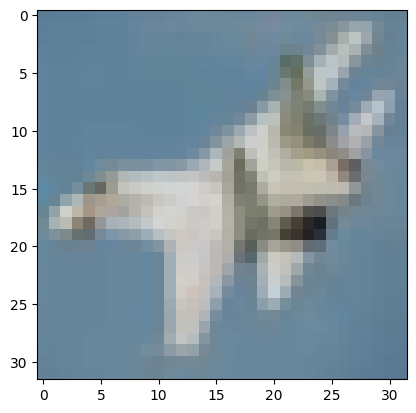

In [8]:
plt.imshow(X_test[10])

In [9]:
y_test[10]

array([0], dtype=uint8)

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                 padding="same", activation="relu"))

### Agrega BatchNormalization tras las convoluciones para estabilizar

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

### Añadiremos otra capa

In [13]:
model.add(tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))

### Añadimos BatchNormalization

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

### Añadimos BatchNormalization

In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

### Añadimos Dropout

In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(0.25))

In [17]:
model.add(tf.keras.layers.Flatten())

# Añadimos Dropout

In [18]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

In [19]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,290 (2.29 MB)

 Trainable params: 600,906 (2.29 MB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Agregamos EarlyStopping

* EarlyStopping corta antes de tiempo si la validación deja de mejorar.

In [22]:
early = EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

### Incremendamos el numero de epocas a 30
### Validacion del 10%
### Indicamos un batch_size de 64

In [23]:
model.fit(
    X_train, y_train,
    epochs=30,                 # más épocas pero con early stopping
    validation_split=0.1,      # 10% para validar
    callbacks=[early],
    batch_size=64              # opcional: mini-batch un poco mayor
)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 1.8938 - sparse_categorical_accuracy: 0.3411 - val_loss: 1.4506 - val_sparse_categorical_accuracy: 0.4908
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.2144 - sparse_categorical_accuracy: 0.5675 - val_loss: 0.9538 - val_sparse_categorical_accuracy: 0.6692
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.9978 - sparse_categorical_accuracy: 0.6484 - val_loss: 0.9766 - val_sparse_categorical_accuracy: 0.6652
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.8865 - sparse_categorical_accuracy: 0.6913 - val_loss: 0.8532 - val_sparse_categorical_accuracy: 0.7120
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.7812 - sparse_categorical_accuracy: 0.7288 - val_loss: 0.7255 - val_sparse_categorical_accuracy: 0.7486
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.7245 - sparse_categorical_accuracy: 0.7456 - val_loss: 0.7214 - val_sparse_categorical_accuracy: 0.7566


### Evaluar el modelo

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6087 - sparse_categorical_accuracy: 0.8017


In [25]:
print("Precision del Test: {}".format(test_accuracy))

Precision del Test: 0.7982000112533569
